# GlucoSense- AI-Powered Diabetes Detection for Early Intervention

#### Project Overview



This project aims to build a machine-learning model that classifies individuals as diabetic or non-diabetic based on early medical indicators. The dataset used for this analysis is the **Early Diabetes Classification Dataset** from Kaggle, which includes key health features such as glucose levels, BMI, age, and insulin levels. The goal is to predict the likelihood of an individual developing diabetes, providing a valuable tool for early intervention and risk assessment.



#### Objective



The main objectives of the project are:

- **Data Collection and Preprocessing**: Gather and clean the dataset to ensure it's suitable for model training.

- **Model Development**: Apply various machine learning algorithms to predict diabetes status.

- **Model Evaluation**: Assess the performance of the models using evaluation metrics such as accuracy, precision, recall, and F1-score.

- **Feature Importance**: Identify the most significant factors contributing to diabetes risk.



#### Methodology



The project follows a structured approach with the following key phases:



##### 1. Data Collection and Preprocessing

- **Dataset**: The dataset used is the [Early Diabetes Classification Dataset](https://www.kaggle.com/datasets/andrewmvd/early-diabetes-classification), which contains health-related features like glucose levels, BMI, age, and insulin levels.

- **Data Preprocessing**: Clean the dataset by handling missing values, outliers, and class imbalances. Data normalization will be applied to scale numerical values appropriately.



##### 2. Feature Selection and Model Building

- **Feature Selection**: To select important features, use correlation analysis, statistical tests, and machine learning techniques like **Recursive Feature Elimination (RFE)**.

- **Model Building**: Implement and compare different machine learning models such as **Logistic Regression**, **Random Forest**, **XGBoost**, and **Support Vector Machines (SVM)**.



##### 3. Model Evaluation and Validation

- **Evaluation Metrics**: Evaluate models using metrics such as **accuracy**, **precision**, **recall**, **F1-score**, and **ROC-AUC** to ensure high performance and generalization.

Cross-Validation: Use techniques like **k-fold cross-validation** to validate the model's robustness and prevent overfitting.



##### 4. Final Presentation and Reporting

- Present the results and insights gained from the model, including the most significant features contributing to the risk of diabetes.

- Provide a detailed report documenting the methodology, findings, and recommendations for healthcare applications.



#### Expected Outcome



The expected outcome is to develop a reliable machine-learning model that can predict the likelihood of an individual developing diabetes based on early health indicators. This tool could potentially assist healthcare professionals in diagnosing diabetes early, enabling better preventative care and treatment strategies.


## 1. Importing Libraries

In this section, we import all necessary libraries to ensure that we have the tools we need for data manipulation, model building, and evaluation. Keeping all imports centralized helps maintain a clean and organized code structure, making it easier to manage and expand upon the project as needed.

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

## 2. Importing the Dataset



In this section, we load the dataset into the notebook for analysis. The dataset used for this project is the **Early Diabetes Classification Dataset** from Kaggle. We'll read the dataset into a pandas DataFrame and inspect its structure to ensure it's ready for preprocessing and analysis.

In [3]:
# Load the dataset
data = pd.read_csv("./Dataset/diabetes_data.csv" , sep=';')

# Display the first few rows of the dataset
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
columns = data.columns

print(columns)

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')


In [5]:
data.dtypes

age                    int64
gender                object
polyuria               int64
polydipsia             int64
sudden_weight_loss     int64
weakness               int64
polyphagia             int64
genital_thrush         int64
visual_blurring        int64
itching                int64
irritability           int64
delayed_healing        int64
partial_paresis        int64
muscle_stiffness       int64
alopecia               int64
obesity                int64
class                  int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

## 3. EDA



In this step, we focus on preparing the data for modeling by addressing missing values, outliers, and duplicates. First, we identify and handle missing values using imputation or removal strategies based on the feature type. Next, we detect and address outliers using statistical methods like Z-score or IQR to prevent distortion in the model. Duplicates are checked and removed if necessary. Lastly, we ensure consistency in data types, correcting any inconsistencies to maintain data integrity before model training.

### Handle Missing Values

In [7]:
data.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

**The dataset has been checked for *missing values*, and there are *no null values* present across any feature.**

### Finding Outliers

#### IQR Method for Outlier Detection

In [8]:
def detect_outliers_lof(df):
    df_numeric = df.select_dtypes(include=['float64', 'int64'])    
    # Fit the LOF model
    model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    outliers = model.fit_predict(df_numeric)    
    # -1 indicates an outlier, 1 indicates a normal point
    outlier_indices = df_numeric.index[outliers == -1].tolist()    
    return outlier_indices

outliers_lof = detect_outliers_lof(data)
print("Outlier indices:", outliers_lof)

Outlier indices: [12, 25, 68, 96, 97, 101, 102, 108, 113, 116, 128, 133, 181, 185, 186, 195, 217, 238, 275, 284, 372, 430, 463, 472, 518]


Our dataset is extremely valuable because it focuses on diabetes, and removing **data points[Outliers]** could lead to significant loss of important information. Therefore, instead of removing outliers outright, we will carefully analyze the data using **histograms** and other visualization techniques to understand their distribution. Based on these observations, we will decide whether to **transform**, **cap**, or **retain** the outliers, rather than removing them completely, ensuring that the integrity of the dataset remains intact.

### Displaying Histograms

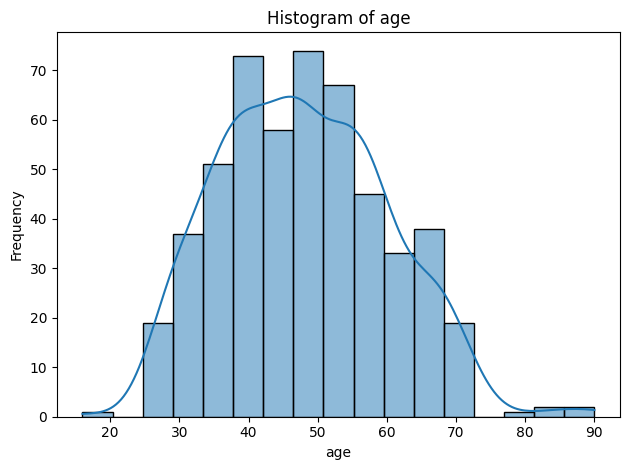

In [9]:
sns.histplot(data['age'], kde=True)
plt.title('Histogram of age')
plt.xlabel('age')
plt.ylabel('Frequency')
    
plt.tight_layout()

plt.show()

Upon reviewing the histograms, it was observed that outliers may contain valuable information, especially in the context of diabetes. Specifically, **age** has some outliers, but we have decided **not to remove** them at this stage, as they might represent important cases for predicting diabetes risk. We will leave the outliers as they are and proceed with further analysis to determine if any transformations are necessary later.

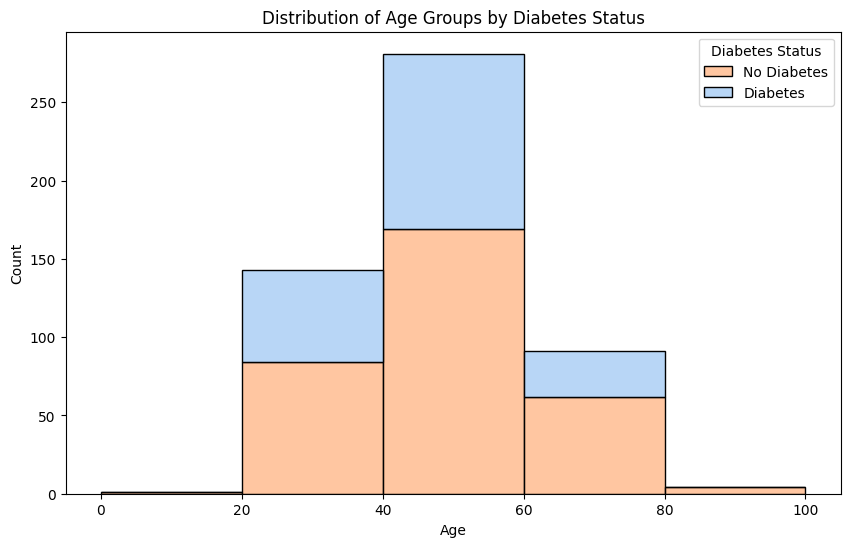

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of bins (you can adjust this for clarity)
bins = range(0, 101, 20)  

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='class', bins=bins, multiple='stack', palette='pastel')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age Groups by Diabetes Status')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])
plt.show()


### Age Distribution by Diabetes Status

The histogram shows the distribution of age groups for individuals with and without diabetes:
- Age groups are divided into bins of 10 years (0-10, 10-20, etc.).
- **Orange bars** represent individuals without diabetes, while **blue bars** represent individuals with diabetes.
- The 40-60 age group has the highest frequency, indicating a larger number of cases in that range for both diabetes and non-diabetes categories.


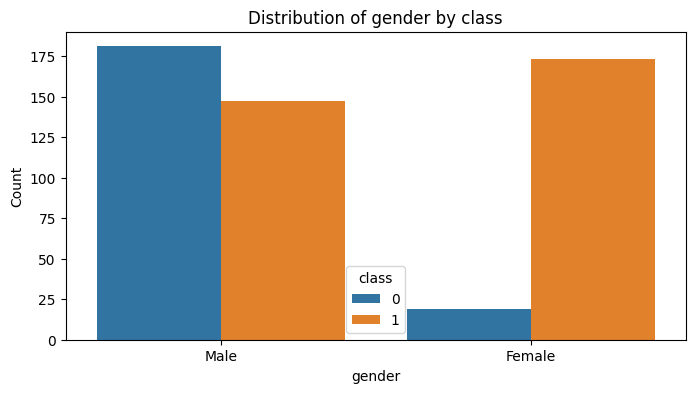

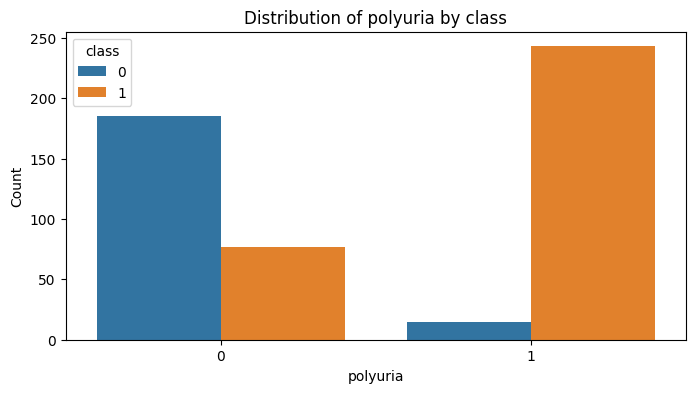

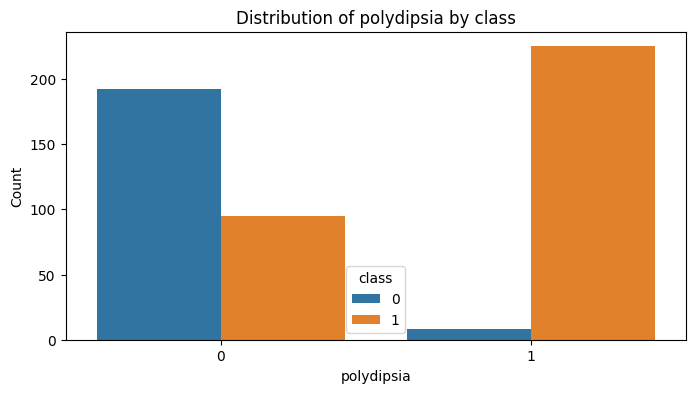

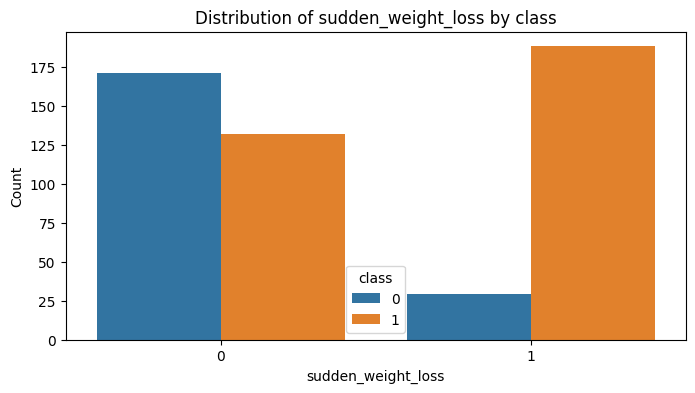

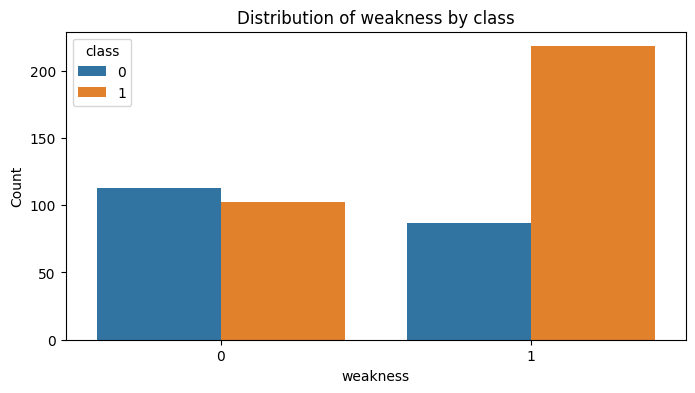

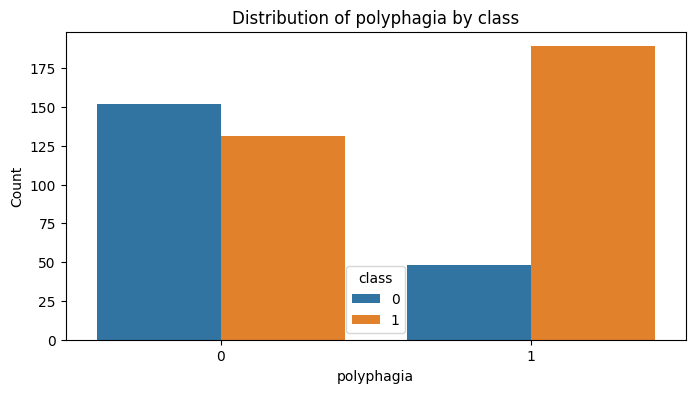

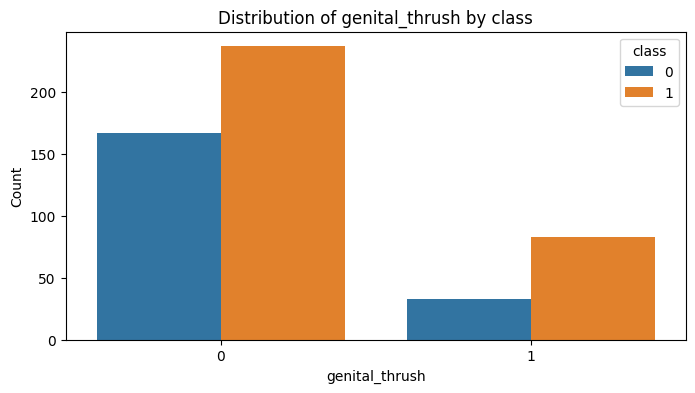

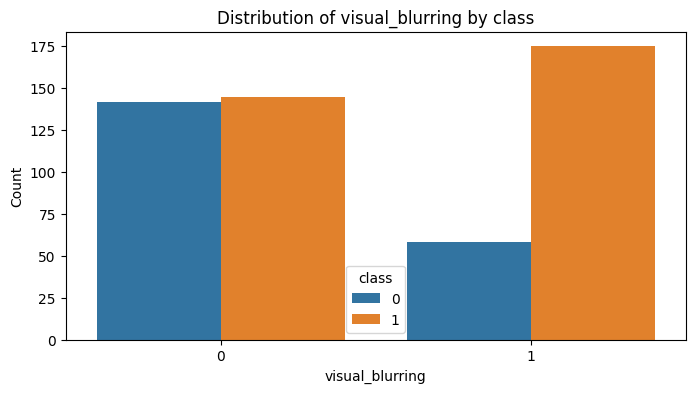

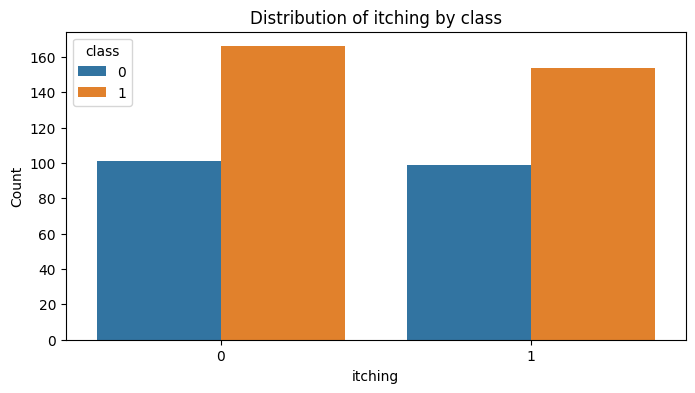

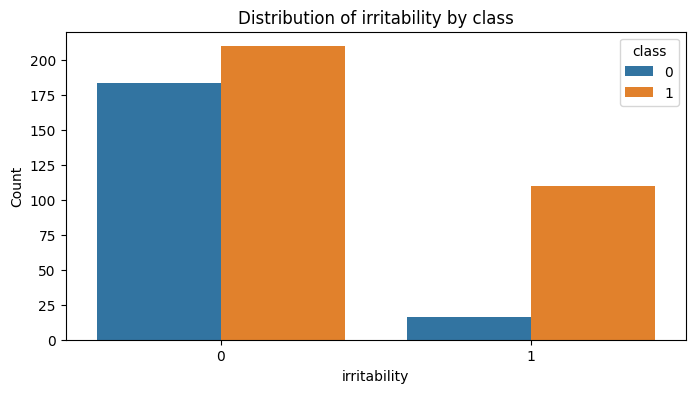

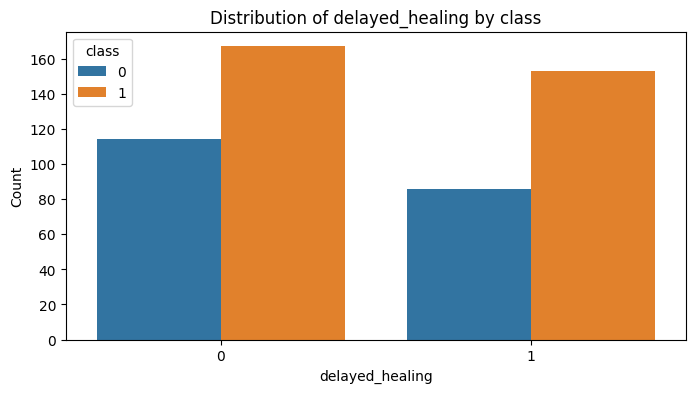

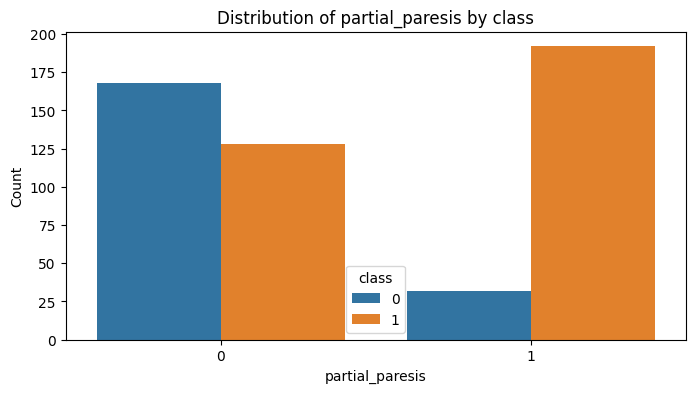

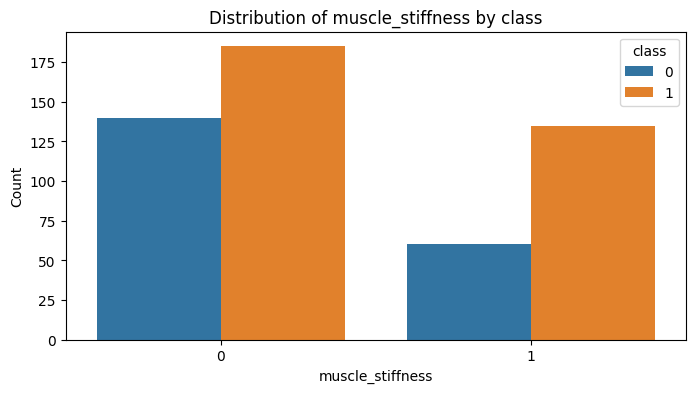

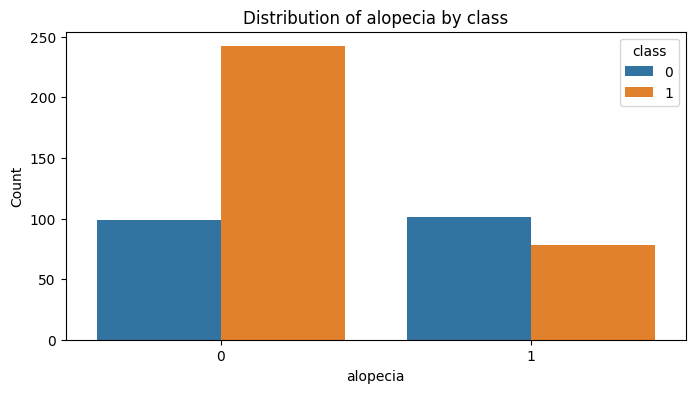

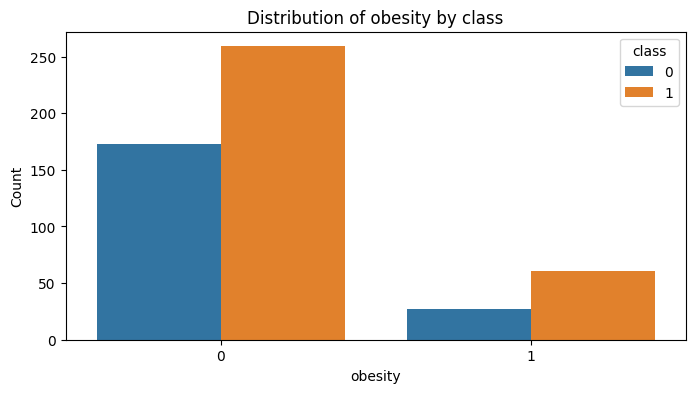

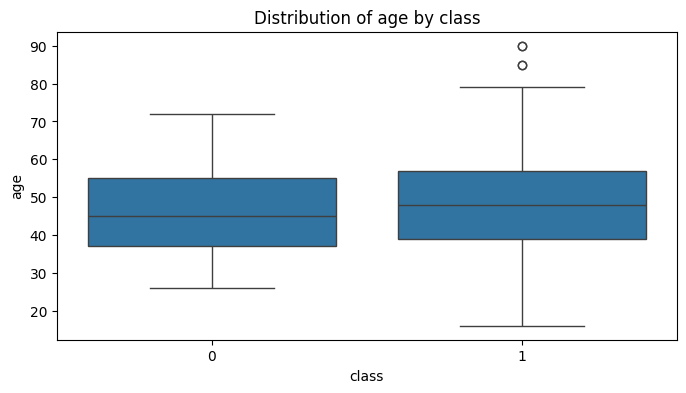

In [11]:
target_column = 'class'

# Define lists for categorical and numerical columns
categorical_columns = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
                       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
                       'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
numerical_columns = ['age']

# Plot each categorical column with respect to the target column
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue=target_column)
    plt.title(f'Distribution of {col} by {target_column}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title=target_column)
    plt.show()

# Plot each numerical column with respect to the target column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=target_column, y=col)
    plt.title(f'Distribution of {col} by {target_column}')
    plt.xlabel(target_column)
    plt.ylabel(col)
    plt.show()


### Pie-Charts

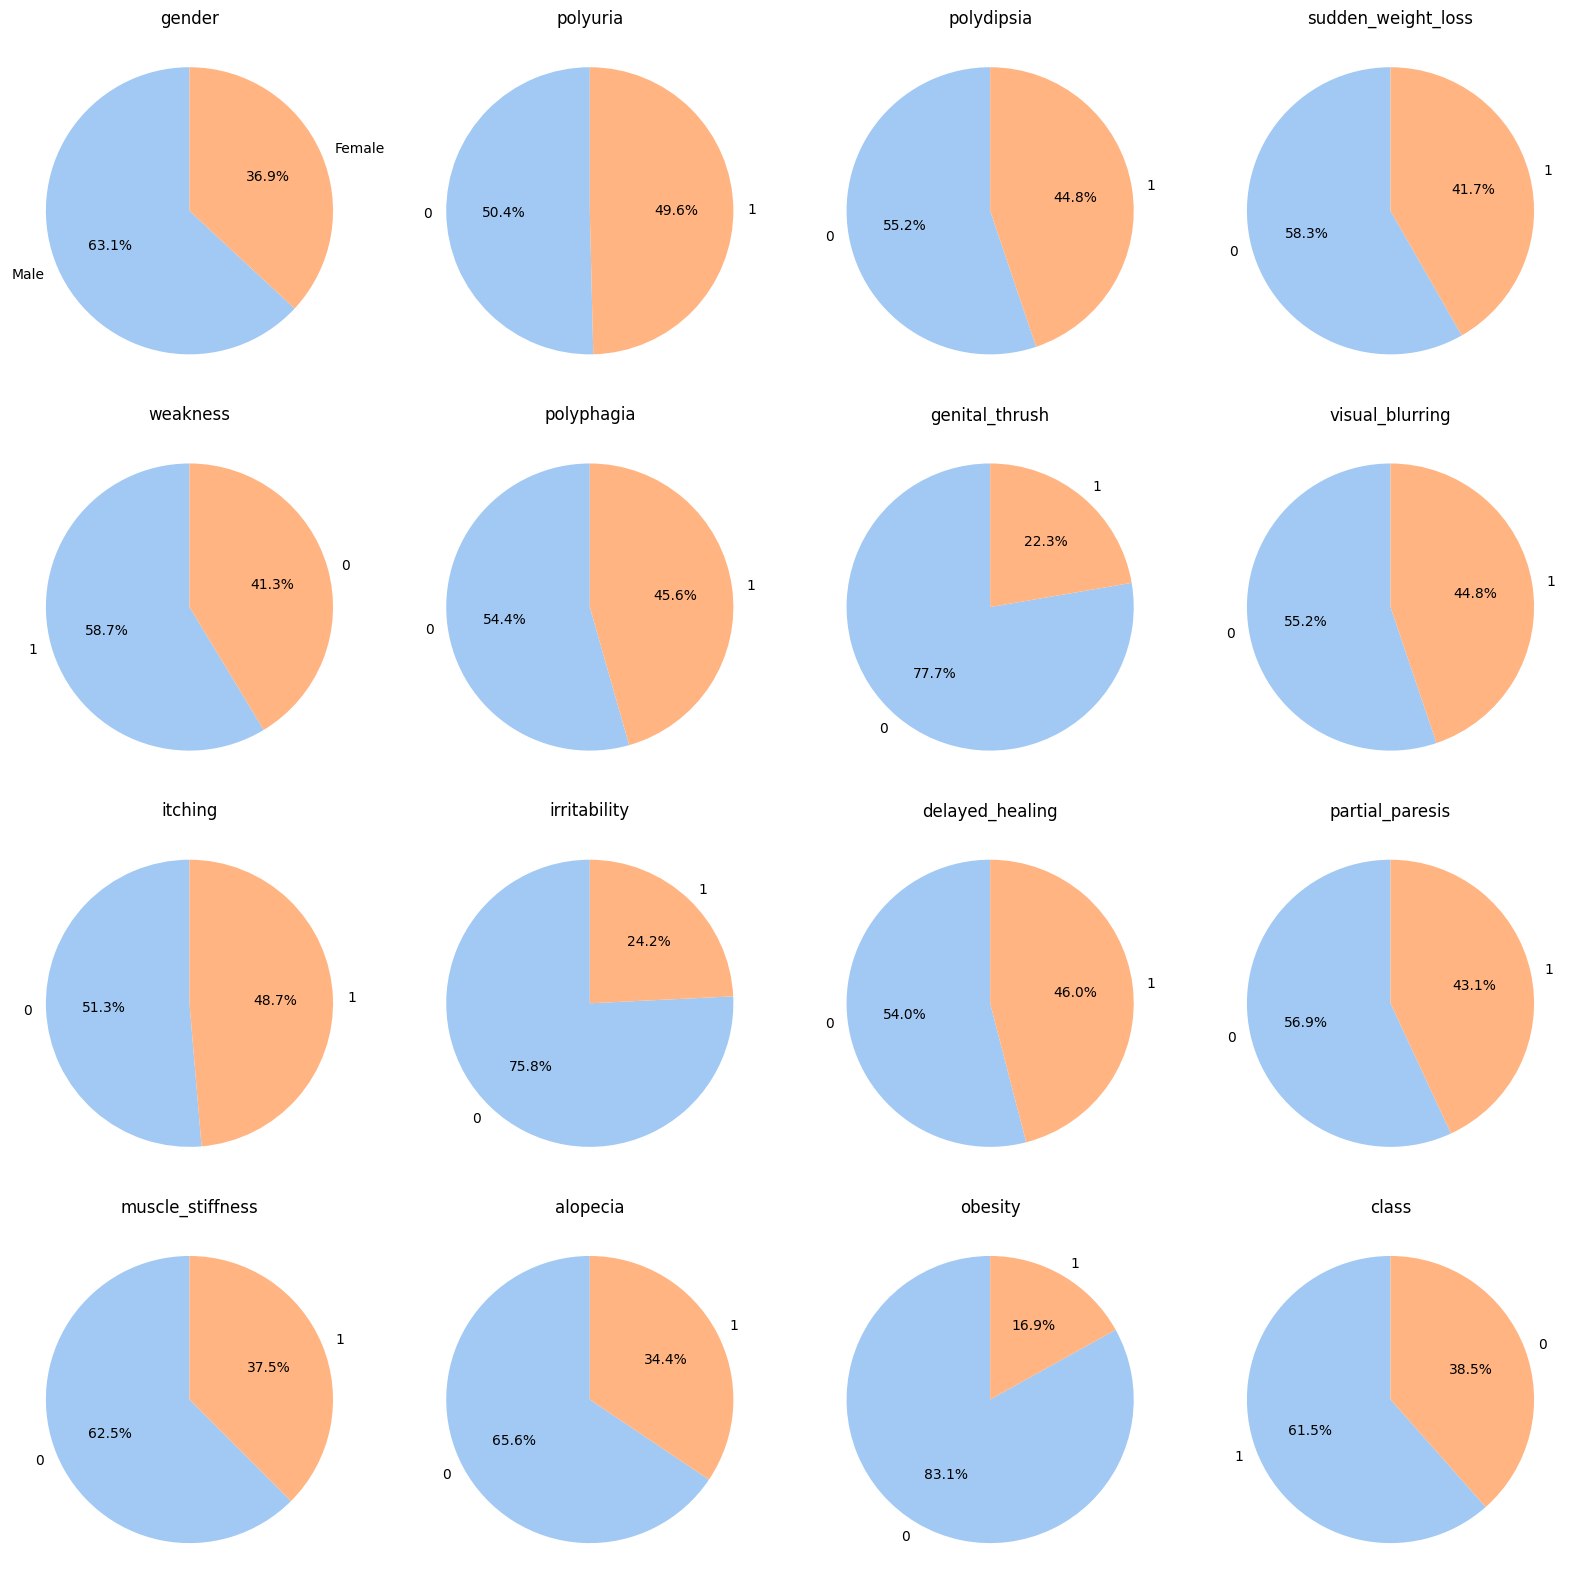

In [12]:
# Set up the figure and axis grid for multiple pie charts
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

# Plot a pie chart for each column except 'age'
for i, column in enumerate([col for col in data.columns if col != 'age']):
    # Count the frequency of each category
    counts = data[column].value_counts()
    
    # Plot pie chart
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    axes[i].set_title(column, fontsize=12)

# Hide any empty subplots (if columns < 15 after excluding 'age')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

This grid of pie charts shows the distribution of various health-related features, with blue and orange segments representing values 0 and 1, respectively. Key observations:

- **Gender**: 63.1% male.
- **Polyuria, Polydipsia**: Fairly balanced between 0 and 1.
- **Genital Thrush**: 77.7% with value 0.
- **Irritability**: 75.8% with value 0.
- **Alopecia**: 65.6% with value 0.
- **Class**: 61.5% with value 0, 38.5% with value 1.

Each pie chart shows the proportion of values for each symptom.


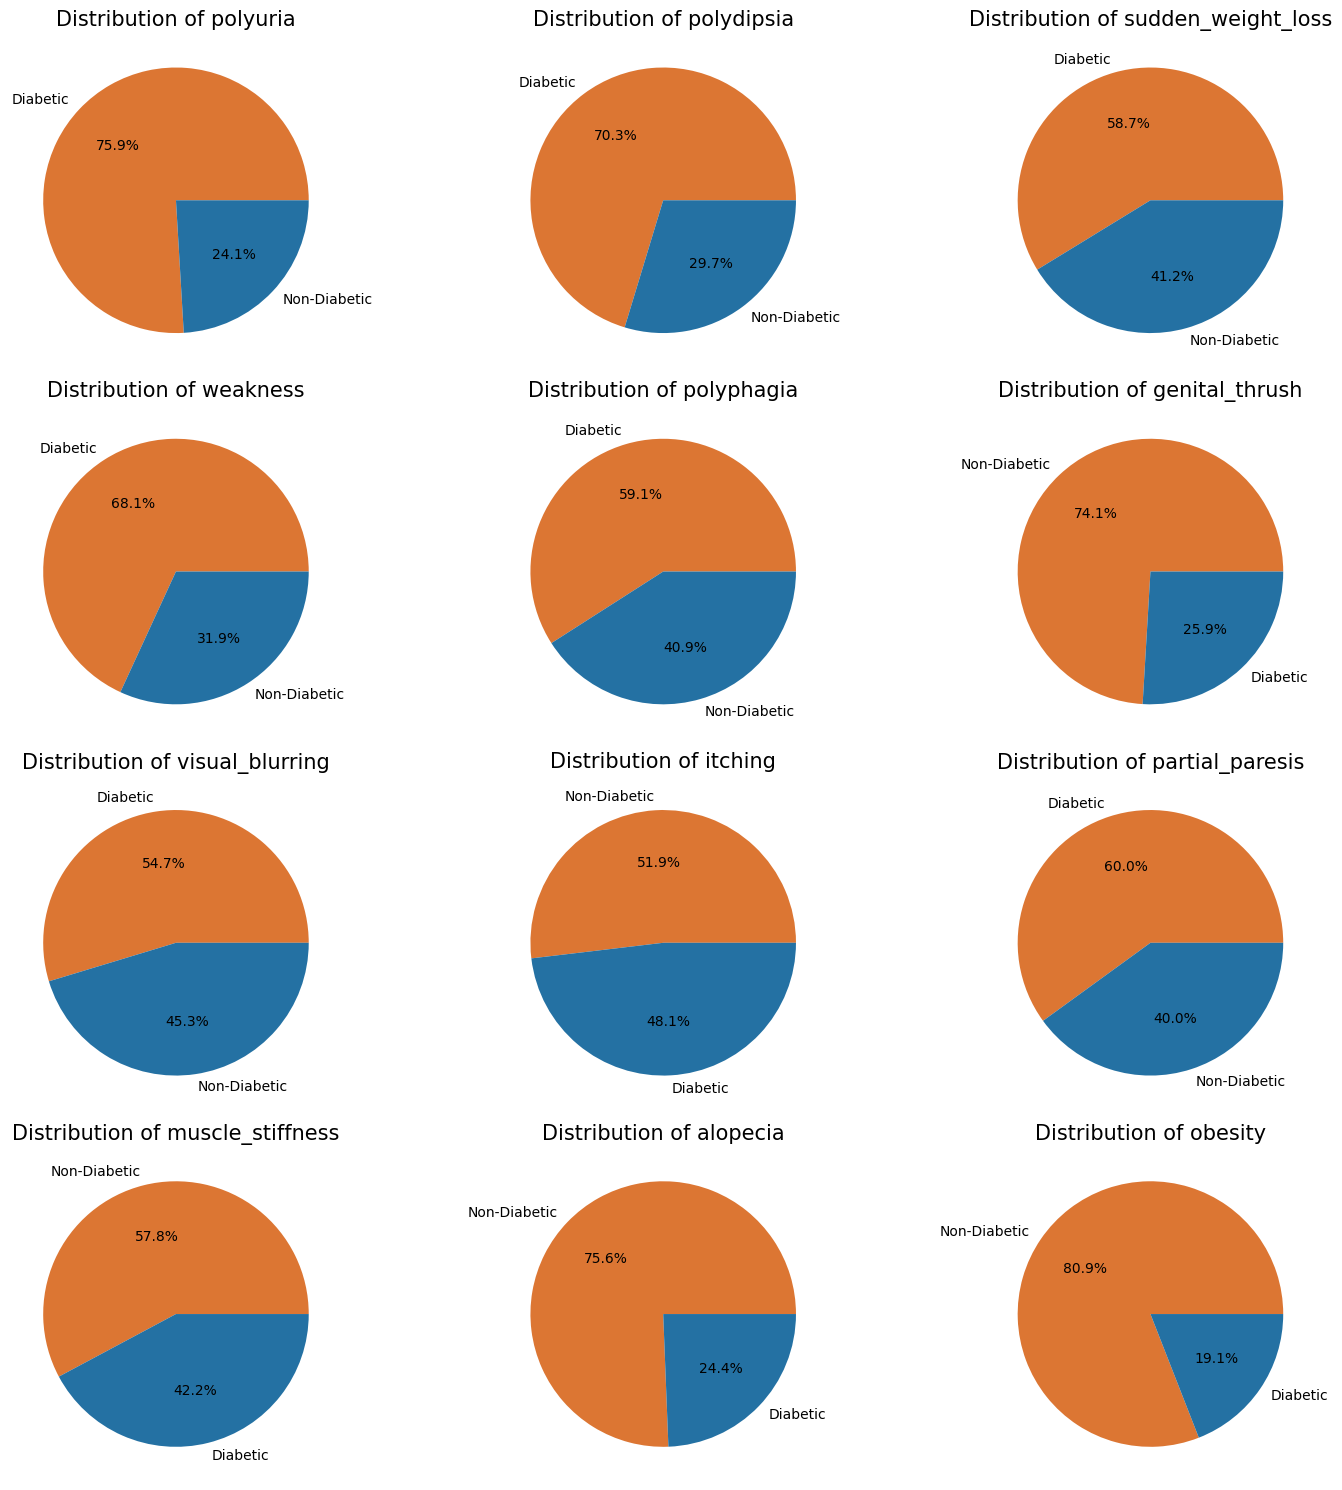

In [36]:
conditions = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 
              'genital_thrush', 'visual_blurring', 'itching',
              'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']

import matplotlib.pyplot as plt

# Filter for diabetic patients
diabetic_df = data[data['class'] == 1]

fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten to easily index each subplot

# Create pie charts for each condition within diabetic patients
for i, condition in enumerate(conditions):
    diabetic_counts = diabetic_df[condition].value_counts()
    
    axes[i].pie(
        diabetic_counts, 
        labels=diabetic_counts.index.map({1: 'Diabetic', 0: 'Non-Diabetic'}), 
        autopct='%1.1f%%', 
        colors=['#dc7633', '#2471a3']
    )
    axes[i].set_title(f"Distribution of {condition}", fontsize=15)

plt.tight_layout()
plt.show()

### Remove Duplicates

In [10]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Drop duplicates if they exist
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")

Number of duplicate rows: 269
Duplicates removed.


### Standardize Data Types

To ensure data consistency, we will standardize the data types across all columns. For columns with **categorical data** (dtype 'object'), we will convert them to **strings**. For **numerical columns**, we will ensure they are of type **float**. This step helps maintain uniformity and prevents issues during model training.

In [11]:
# Ensure consistent data types
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype(str)
    else:
        data[col] = data[col].astype(float)

### Data Transformation

**Why Scaling Age and Not Other Features?**



Age is a numerical feature that can have a wide range (e.g., from 0 to 100+). Scaling it ensures that its values don't disproportionately affect models that are sensitive to feature magnitudes, such as KNN or SVM. Other features may already be on a similar scale or are categorical, so they don’t require scaling.

In [12]:
# Initialize the scaler
scaler = MinMaxScaler()
# Scale the 'age' feature to the range [0, 1]
data['age'] = scaler.fit_transform(data[['age']])
# Check the first few scaled values
print(data['age'].head())

0    0.324324
1    0.567568
2    0.337838
3    0.391892
4    0.594595
Name: age, dtype: float64


In [13]:
data['age'].describe()

count    251.000000
mean       0.444115
std        0.169271
min        0.000000
25%        0.310811
50%        0.432432
75%        0.567568
max        1.000000
Name: age, dtype: float64

### Encoding Categorical Variables

**We use Label Encoding for the gender column because it contains two categories, "male" and "female". Label Encoding converts these categories into numeric values (e.g., 0 for "male" and 1 for "female"). This transformation is required by most machine learning models, as they expect numerical input**

In [14]:
# Apply Label Encoding to the 'gender' column
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
# Check the transformed data
data['gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

In [15]:
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.567568,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.337838,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.391892,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.594595,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Descriptive Statistics

In [16]:
data.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.444115,0.637450,0.525896,0.494024,0.414343,0.633466,0.466135,0.266932,0.442231,0.505976,0.282869,0.498008,0.446215,0.390438,0.358566,0.175299,0.689243
std,0.169271,0.481697,0.500327,0.500963,0.493592,0.482820,0.499849,0.443241,0.497644,0.500963,0.451293,0.500995,0.498092,0.488823,0.480538,0.380982,0.463728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.310811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.432432,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.567568,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Univariate Analysis

[Click here to view Histograms](#Displaying-Histograms)

### Bivariate Analysis

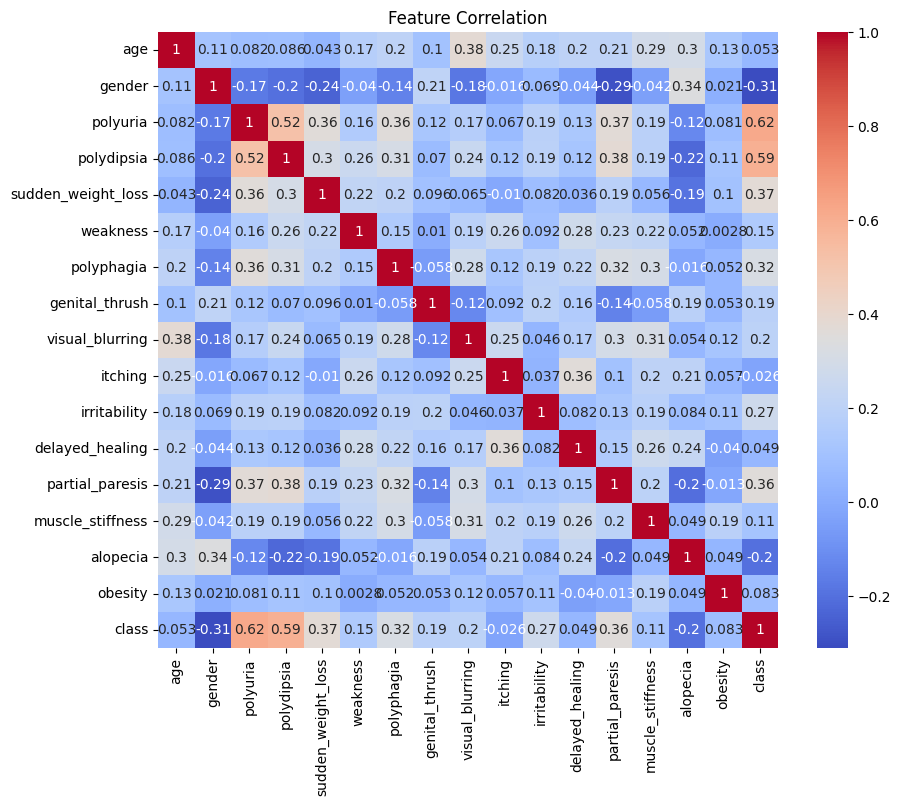

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

#### Analysis of Feature Correlation Heatmap



### Correlation Heatmap Analysis

1. **High Positive Correlation with Class (Target Variable)**:
   - **Polyuria** (0.62) and **Polydipsia** (0.59) are strongly correlated with the target variable (`class`), meaning these symptoms have a high association with the class label.

2. **Moderate Positive Correlation with Class**:
   - **Partial Paresis** (0.36) and **Delayed Healing** (0.26) also positively correlate with `class`, but to a lesser extent.

3. **Negative Correlation with Class**:
   - **Gender** (-0.31) and **Alopecia** (-0.2) have a moderate negative correlation with the `class`, indicating that these features are less likely to be associated with the target class.

4. **Feature Interrelationships**:
   - **Polyuria** and **Polydipsia** have a high positive correlation (0.52), showing that these symptoms often appear together.
   - **Partial Paresis** has moderate positive correlations with **Polyuria** (0.37), **Polydipsia** (0.38), and **Delayed Healing** (0.36).

5. **Weak Correlations**:
   - Many features, such as **Weakness**, **Itching**, and **Genital Thrush**, have very low or weak correlations with `class` and most other features.

6. **Observations on Other Features**:
   - **Visual Blurring** and **Age** have a slightly negative correlation with each other (-0.38).
   - Most features show weak correlations, indicating the limited association between symptoms in the dataset.

This heatmap provides insights into feature relationships and their impact on the target variable, useful for feature selection in model building.
